# Naive Bayes

## Exercise 1

Learned probabilities

Given the following run of the Naive Bayes algorithm without smoothing:

In [2]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB

# Create the training set
features = ['study', 'free', 'money']
target = 'is_spam'
messages = pd.DataFrame(
[(1, 0, 0, 0),
(0, 0, 1, 0),
(1, 0, 0, 0),
(1, 1, 0, 0)] +
[(0, 1, 0, 1)] * 4 +
[(0, 1, 1, 1)] * 4,
columns=features+[target])

# Create the prediction set
X = messages[features]
y = messages[target]
cl = BernoulliNB(alpha=1e-10).fit(X, y)

print(cl.class_log_prior_)
print(cl.feature_log_prob_)

[-1.09861229 -0.40546511]
[[-2.87682072e-01 -1.38629436e+00 -1.38629436e+00]
 [-2.51052925e+01 -1.24997790e-11 -6.93147181e-01]]


1. Write a function that independently calculates the value of the `class_log_prior_` attribute without smoothing using only `messages` as parameter. (These are the natural logarithms of class probabilities $P(v_j)$).
2. Write a function that independently calculates the value of the `feature_log_prob_` attribute without smoothing using only `messages` as parameter. (These are the natural logarithms of attribute probabilities $P(a_i|v_j)$).

## Exercise 2
Expected error rate in training

Consider a binary classification problem with features $X_1$ and $X_2$ and label $Y$. The two features are assumed to be conditionally independent with respect to $Y$ . The prior probabilities $P(Y=0)$ and $P(Y=1)$ are both equal to 0.5. The conditional probabilities are:

<table style="float: left;">
    <tr>
        <th>P(X1|Y)</th>
        <th>Y=0</th>
        <th>Y=1</th></tr>
    <tr>
        <th>X1=0</th>
        <td>0.7</td>
        <td>0.2</td></tr>
    <tr>
        <th>X1=1</th>
        <td>0.3</td>
        <td>0.8</td>
    </tr>
</table>

<table style="float: left; margin-left: 20px;">
    <tr>
        <th>P(X2|Y)</th>
        <th>Y=0</th>
        <th>Y=1</th></tr>
    <tr>
        <th>X2=0</th>
        <td>0.9</td>
        <td>0.5</td></tr>
    <tr>
        <th>X2=1</th>
        <td>0.1</td>
        <td>0.5</td>
    </tr>
</table>

<br style="clear: left;" />

1. Generate a `DataFrame` with 1000 entries and three columns `['x1', 'x2', 'y']`, according to the description above, using the `bernoulli.rvs` function from `scipy`.
1. After training on the DataFrame above, predict every combination of values for $X_1$ and $X_2$.
1. Calculate the average error rate on the training dataset.
1. Create a new attribute $X_3$ as a copy of $X_2$. What is the new average error rate on the training dataset?

## Exercise 3
Joint Bayes

Considering the dataset below:

In [3]:
import pandas as pd
from tools.pd_helpers import apply_counts

d = pd.DataFrame({'X1': [0, 0,  1, 1, 0, 0, 1, 1],
                  'X2': [0, 0,  0, 0, 1, 1, 1, 1],
                  'C' : [2, 18, 4, 1, 4, 1, 2, 18],
                  'Y' : [0, 1,  0, 1, 0, 1, 0, 1]})
d=apply_counts(d, 'C')

1. Implement a simple version of the Joint Bayes algorithm by creating the `BernoulliJB` class, similar to `BernoulliNB` from `scikit`, but only implement the `fit(X,y)` and `predict_proba(X)` without smoothing.
1. How many probabilities are estimated by the the Joint Bayes algorithm?
1. What are probability estimates for the instance $X_1 = 0$, $X_2 = 0$ calculated by `predict_proba(X)` from `BernoulliJB`?
1. What is the final classification of Naive Bayes (using `BernoulliNB`) without smoothing for this instance?

## Exercise 4
Measuring the naivety assumption

Consider a simple text classification that only considers two words: $w_1$ and $w_2$. The label $y$ will only be 1 if $w_1$ is present and $w_2$ is not, so the label is effectively the function $w1 \land \lnot w2$.

The `correlated_df` function below will return such a dataset, with 10,000 entries and the columns `['w1', 'w2', 'y']`. The parameter `corr` specifies approximately how much correlation should exist between `w1` and `w2`.

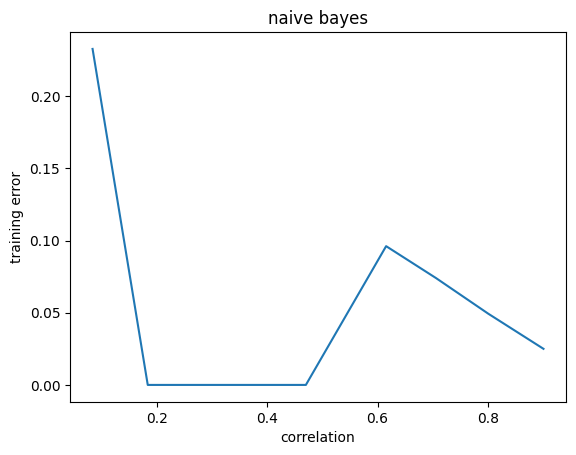

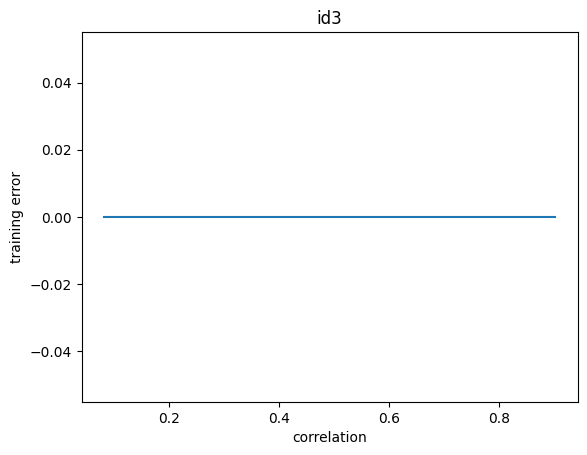

In [37]:
from scipy.stats import bernoulli
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn import tree

size = 10000

def correlated_df(corr):
    w1 = bernoulli.rvs(0.5, size=size, random_state=1)
    d = pd.DataFrame({'w1': w1})
    mask = bernoulli.rvs(corr, size=size, random_state=2)
    random = bernoulli.rvs(0.5, size=size, random_state=3)
    d['w2'] = d['w1'] & mask | random & ~mask
    d['mask'] = mask
    d['random'] = random
    d['y'] = d['w1'] & ~ d['w2']
    return d

d = correlated_df(0.5)

# Check that the correlation is indeed close to 0.5
# print("Correlation: ", pearsonr(d['w1'], d['w2']))

x1 = list()
y1 = list()
for index in range(1,10):
    d = correlated_df(index/10)
    cl = BernoulliNB().fit(X, y)
    X = d[['w1','w2']]
    y = d['y']

    x1.append(pearsonr(d['w1'], d['w2']).statistic)
    y1.append(1 - cl.score(X, y))

plt.plot(x1, y1)
plt.title('naive bayes')
plt.xlabel('correlation')
plt.ylabel('training error')
plt.show()


x2 = list()
y2 = list()
for index in range(1,10):
    d = correlated_df(index/10)
    classifier = tree.DecisionTreeClassifier(criterion='entropy')
    dt = classifier.fit(X, y)
    X = d[['w1','w2']]
    y = d['y']

    x2.append(pearsonr(d['w1'], d['w2']).statistic)
    y2.append(1 - dt.score(X, y))

plt.plot(x2, y2)
plt.title('id3')
plt.xlabel('correlation')
plt.ylabel('training error')
plt.show()

1. With the function above, create a line chart using `matplotlib` that shows how the correlation affects the training error of Naive Bayes (no smoothing).
1. Using the function above, create a line chart that shows how the correlation affects the training error of a decision tree classifier (see the `DecisionTreeClassifier` class from `sklearn`).

## Exercise 5
Average error rate

Given the function $Y = (A \land B) \lor \neg(B \lor C)$ where $A$, $B$ and $C$ are independent binary random variables, each of which having 50% chance of being 0 and 50% chance of being 1.

1. Generate a DataFrame with 1000 entries and four columns `A`, `B`, `C` and `Y`, according to the description above, using the `bernoulli.rvs` function from `scipy`.
1. Calculate the error rate on the training dataset.
1. What is the average error rate on this training dataset for the Joint Bayes algorithm? (Note that you don't have to actually build the algorithm, just provide a theoretical justification.)

In [44]:
from scipy.stats import bernoulli
import pandas as pd
from sklearn.naive_bayes import BernoulliNB

def generate(size: int) -> pd.DataFrame:
    a = bernoulli.rvs(0.5, size=size, random_state=1)
    b = bernoulli.rvs(0.5, size=size, random_state=2)
    c = bernoulli.rvs(0.5, size=size, random_state=3)
    d = pd.DataFrame({'A': a, 'B': b, 'C': c})
    d['Y'] = (d['A'] & d['B']) | ~(d['B'] | d['C'])
    d.replace({-2:0, -1:1}, inplace=True)
    return d

d = generate(1000)
X = d[['A','B','C']]
y = d['Y']
cl = BernoulliNB().fit(X, y)
print(f"error rate on the training dataset: {cl.score(X, y)}")

error rate on the training dataset: 0.783


## Exercise 6
Text classification

A news company would like to automatically sort the news articles related to sport from those related to politics. They are using 8 key words ($w_1,...,w_8)$ and have annotated several articles in each category for training:

In [15]:
import pandas as pd

features = [f'w{i}' for i in range(1,9)]

politics=pd.DataFrame([
(1, 0, 1, 1, 1, 0, 1, 1),
(0, 0, 0, 1, 0, 0, 1, 1),
(1, 0, 0, 1, 1, 0, 1, 0),
(0, 1, 0, 0, 1, 1, 0, 1),
(0, 0, 0, 1, 1, 0, 1, 1),
(0, 0, 0, 1, 1, 0, 0, 1)],
columns=features)

sport=pd.DataFrame([
(1, 1, 0, 0, 0, 0, 0, 0),
(0, 0, 1, 0, 0, 0, 0, 0),
(1, 1, 0, 1, 0, 0, 0, 0),
(1, 1, 0, 1, 0, 0, 0, 1),
(1, 1, 0, 1, 1, 0, 0, 0),
(0, 0, 0, 1, 0, 1, 0, 0),
(1, 1, 1, 1, 1, 0, 1, 0)],
columns=features)

print(5**4 / ((3**3)*(6**4)*13))
print( ((5**3) * (2**3) * 3) / ((7**7) * 13) )

0.0013739404171502936
0.0002802151566696952


According to Naive Bayes (without smoothing), what is the probability that the document `x = (1, 0, 0, 1, 1, 1, 1, 0)` is about politics?